In [1]:
 ! pip install fiftyone
 ! pip install fiftyone torch torchvision 



In [2]:
!pip install youtube-dl

In [9]:
from datetime import timedelta
import json
import os
# import torch
import subprocess
import youtube_dl
from youtube_dl.utils import (DownloadError, ExtractorError) 
import cv2
import numpy as np
import torch
# import torch.nn as nn
# import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import *

In [ ]:
ls

data.csv  googlenet-1378be20.pth  train.json  Untitled.ipynb  videos/


In [ ]:
 def download_video(url, start, dur, output):
        output_tmp = os.path.join("/tmp",os.path.basename(output))
        try:
            with youtube_dl.YoutubeDL({'format': 'best'}) as ydl:
                 result = ydl.extract_info(url, download=False)
                 video = result['entries'][0] if 'entries' in result else result
            url = video['url']
            if start < 5:
                 offset = start
            else:
                 offset = 5
            start -= offset
            offset_dur = dur + offset
            start_str = str(timedelta(seconds=start)) 
            dur_str = str(timedelta(seconds=offset_dur)) 
            cmd = ['ffmpeg', '-i', url, '-ss', start_str, '-t', dur_str, '-c:v',
                     'copy', '-c:a', 'copy', output_tmp]
            subprocess.call(cmd)
            start_str_2 = str(timedelta(seconds=offset)) 
            dur_str_2 = str(timedelta(seconds=dur)) 
            cmd = ['ffmpeg', '-i', output_tmp, '-ss', start_str_2, '-t', dur_str_2, output]
            subprocess.call(cmd)
            return True
        except (DownloadError, ExtractorError) as e:
            print("Failed to download %s" % output)
            return False 

with open("train.json", "r") as f:
     train_data = json.load(f)
target_classes = [
'springboard diving',
'surfing water',
'swimming backstroke',
'swimming breast stroke',
'swimming butterfly stroke',
]

data_dir = "./videos"
max_samples = 5
classes_count = {c:0 for c in target_classes}
for fn, data in train_data.items():
    result=None
    label = data["annotations"]["label"]
    segment = data["annotations"]["segment"]
    url = data["url"]
    dur = data["duration"]
    if label in classes_count and classes_count[label] < max_samples:
        
        c_dir = os.path.join(data_dir, label)
        print(c_dir,fn)
        if not os.path.exists(c_dir):
             os.makedirs(c_dir)
        start = segment[0]
        output = os.path.join(c_dir, "%s_%s.mp4" % (label.replace(" ","_"), fn))
        results = True
        if not os.path.exists(output):
            print("downloading")
            result = download_video(url, start, dur, output)
        if result:
             classes_count[label] += 1
print("Finished downloading videos!") 

./videos/surfing water --coBvtS-eQ
./videos/swimming butterfly stroke -15OAjLm520
./videos/swimming butterfly stroke -2mSk2B2tzo
./videos/swimming butterfly stroke -4E8BFFUJ4Q
downloading
[youtube] -4E8BFFUJ4Q: Downloading webpage
[youtube] -4E8BFFUJ4Q: Downloading MPD manifest


ffmpeg version 4.2.4-1ubuntu0.1 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.3.0-10ubuntu2)
  configuration: --prefix=/usr --extra-version=1ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-l

./videos/swimming butterfly stroke -7CUmysoRwA
./videos/swimming butterfly stroke -7axUnKiycE
./videos/swimming butterfly stroke -ACmDOgDvEk
downloading
[youtube] -ACmDOgDvEk: Downloading webpage


ffmpeg version 4.2.4-1ubuntu0.1 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.3.0-10ubuntu2)
  configuration: --prefix=/usr --extra-version=1ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-l

Failed to download ./videos/swimming butterfly stroke/swimming_butterfly_stroke_-ACmDOgDvEk.mp4
./videos/springboard diving -AJ3JIMaS18
./videos/springboard diving -Bdv7Fhix2g
./videos/swimming butterfly stroke -C14uYB_V_Q
downloading
[youtube] -C14uYB_V_Q: Downloading webpage
[youtube] -C14uYB_V_Q: Downloading MPD manifest


ffmpeg version 4.2.4-1ubuntu0.1 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.3.0-10ubuntu2)
  configuration: --prefix=/usr --extra-version=1ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-l

./videos/swimming breast stroke -EtzU3Qj7gQ
./videos/swimming breast stroke -GvFmYm0xwQ
./videos/swimming butterfly stroke -JIvn5VWIKQ
downloading
[youtube] -JIvn5VWIKQ: Downloading webpage


frame=  300 fps=0.0 q=-1.0 Lsize=     490kB time=00:00:10.00 bitrate= 401.2kbits/s speed=12.9x    
video:394kB audio:85kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 2.312204%
[libx264 @ 0x555d7be2a700] frame I:2     Avg QP:24.83  size:  4764
[libx264 @ 0x555d7be2a700] frame P:192   Avg QP:26.08  size:  1631
[libx264 @ 0x555d7be2a700] frame B:106   Avg QP:28.91  size:   757
[libx264 @ 0x555d7be2a700] consecutive B-frames: 48.7%  8.7% 12.0% 30.7%
[libx264 @ 0x555d7be2a700] mb I  I16..4:  4.3% 79.3% 16.3%
[libx264 @ 0x555d7be2a700] mb P  I16..4:  2.7%  6.8%  1.3%  P16..4: 53.8% 18.4%  4.7%  0.0%  0.0%    skip:12.2%
[libx264 @ 0x555d7be2a700] mb B  I16..4:  0.3%  0.7%  0.2%  B16..8: 55.6%  9.7%  1.4%  direct: 3.2%  skip:28.9%  L0:55.3% L1:37.0% BI: 7.7%
[libx264 @ 0x555d7be2a700] 8x8 transform intra:63.9% inter:71.7%
[libx264 @ 0x555d7be2a700] coded y,uvDC,uvAC intra: 68.1% 72.0% 22.7% inter: 24.4% 29.4% 1.3%
[libx264 @ 0x555d7be2a700] i16 v,h,dc,p:  3% 80%  2% 15%


[youtube] -JIvn5VWIKQ: Downloading MPD manifest


ffmpeg version 4.2.4-1ubuntu0.1 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.3.0-10ubuntu2)
  configuration: --prefix=/usr --extra-version=1ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-l

./videos/swimming butterfly stroke -K_573BJUgs
downloading
[youtube] -K_573BJUgs: Downloading webpage


frame=  250 fps=0.0 q=-1.0 Lsize=    1108kB time=00:00:10.00 bitrate= 907.1kbits/s dup=1 drop=0 speed=10.2x    
video:1014kB audio:85kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 0.860479%
[libx264 @ 0x55ef36a81740] frame I:4     Avg QP:23.82  size: 11510
[libx264 @ 0x55ef36a81740] frame P:85    Avg QP:26.42  size:  8433
[libx264 @ 0x55ef36a81740] frame B:161   Avg QP:29.52  size:  1705
[libx264 @ 0x55ef36a81740] consecutive B-frames:  3.6% 23.2% 25.2% 48.0%
[libx264 @ 0x55ef36a81740] mb I  I16..4:  8.9% 53.9% 37.2%
[libx264 @ 0x55ef36a81740] mb P  I16..4:  4.3% 21.5% 18.8%  P16..4: 28.4% 15.7%  4.3%  0.0%  0.0%    skip: 7.0%
[libx264 @ 0x55ef36a81740] mb B  I16..4:  1.1%  1.9%  1.4%  B16..8: 20.0%  6.5%  1.0%  direct: 5.5%  skip:62.5%  L0:29.5% L1:59.5% BI:11.1%
[libx264 @ 0x55ef36a81740] 8x8 transform intra:47.8% inter:36.1%
[libx264 @ 0x55ef36a81740] coded y,uvDC,uvAC intra: 80.4% 65.1% 21.6% inter: 19.2% 13.6% 0.4%
[libx264 @ 0x55ef36a81740] i16 v,h,dc,p: 10

./videos/swimming butterfly stroke -L3CYodyiMo
downloading
[youtube] -L3CYodyiMo: Downloading webpage


frame=  250 fps= 56 q=-1.0 Lsize=    4244kB time=00:00:10.00 bitrate=3473.7kbits/s dup=1 drop=0 speed=2.22x    
video:4077kB audio:157kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 0.225428%
[libx264 @ 0x561d7a882a40] frame I:2     Avg QP:23.18  size: 59859
[libx264 @ 0x561d7a882a40] frame P:69    Avg QP:25.48  size: 30756
[libx264 @ 0x561d7a882a40] frame B:179   Avg QP:28.13  size: 10797
[libx264 @ 0x561d7a882a40] consecutive B-frames:  1.6%  6.4%  7.2% 84.8%
[libx264 @ 0x561d7a882a40] mb I  I16..4: 16.1% 44.8% 39.2%
[libx264 @ 0x561d7a882a40] mb P  I16..4:  8.6% 18.3%  5.2%  P16..4: 36.8% 19.7%  6.0%  0.0%  0.0%    skip: 5.3%
[libx264 @ 0x561d7a882a40] mb B  I16..4:  1.7%  2.5%  0.8%  B16..8: 50.1%  9.6%  1.2%  direct: 3.9%  skip:30.2%  L0:45.5% L1:42.1% BI:12.5%
[libx264 @ 0x561d7a882a40] 8x8 transform intra:54.4% inter:62.2%
[libx264 @ 0x561d7a882a40] coded y,uvDC,uvAC intra: 53.5% 77.7% 29.8% inter: 19.8% 30.2% 1.9%
[libx264 @ 0x561d7a882a40] i16 v,h,dc,p: 1

[youtube] -L3CYodyiMo: Downloading MPD manifest


ffmpeg version 4.2.4-1ubuntu0.1 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.3.0-10ubuntu2)
  configuration: --prefix=/usr --extra-version=1ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-l

./videos/surfing water -MlgcPXUZs8
./videos/springboard diving -PLY-Bl2b4o
downloading
[youtube] -PLY-Bl2b4o: Downloading webpage


frame=  250 fps= 59 q=-1.0 Lsize=    3170kB time=00:00:10.00 bitrate=2595.0kbits/s dup=1 drop=0 speed=2.37x    
video:3158kB audio:3kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 0.303354%
[libx264 @ 0x55dd641e8b80] frame I:1     Avg QP:23.38  size: 39288
[libx264 @ 0x55dd641e8b80] frame P:64    Avg QP:24.58  size: 20312
[libx264 @ 0x55dd641e8b80] frame B:185   Avg QP:26.57  size: 10237
[libx264 @ 0x55dd641e8b80] consecutive B-frames:  0.8%  0.8%  2.4% 96.0%
[libx264 @ 0x55dd641e8b80] mb I  I16..4: 19.3% 64.8% 15.8%
[libx264 @ 0x55dd641e8b80] mb P  I16..4:  9.3% 39.0%  2.7%  P16..4: 26.1%  9.6%  3.4%  0.0%  0.0%    skip: 9.9%
[libx264 @ 0x55dd641e8b80] mb B  I16..4:  2.2% 11.6%  0.8%  B16..8: 38.9%  8.9%  1.3%  direct: 3.6%  skip:32.6%  L0:50.6% L1:43.8% BI: 5.5%
[libx264 @ 0x55dd641e8b80] 8x8 transform intra:77.7% inter:83.8%
[libx264 @ 0x55dd641e8b80] coded y,uvDC,uvAC intra: 59.5% 64.4% 12.4% inter: 19.6% 23.0% 0.7%
[libx264 @ 0x55dd641e8b80] i16 v,h,dc,p: 10%

Failed to download ./videos/springboard diving/springboard_diving_-PLY-Bl2b4o.mp4
./videos/surfing water -QKOeEPeNa8
./videos/swimming backstroke -WCJHul7yrw
./videos/springboard diving -XLx2qBr3I4
./videos/surfing water -Yo8aAfBd_4
./videos/surfing water -aGeMK91ocM
./videos/swimming breast stroke -bjbA_Vbcss
./videos/surfing water -dAWQCYyE2Q
downloading
[youtube] -dAWQCYyE2Q: Downloading webpage
[youtube] -dAWQCYyE2Q: Downloading MPD manifest


ffmpeg version 4.2.4-1ubuntu0.1 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.3.0-10ubuntu2)
  configuration: --prefix=/usr --extra-version=1ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-l

./videos/swimming breast stroke -eYXPoMyrXw
./videos/swimming breast stroke -fOPck1xRFk
./videos/surfing water -gWTAB2PAQg
downloading
[youtube] -gWTAB2PAQg: Downloading webpage


frame=  300 fps=288 q=-1.0 Lsize=     665kB time=00:00:10.00 bitrate= 544.5kbits/s dup=1 drop=0 speed=9.61x    
video:497kB audio:157kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 1.704739%
[libx264 @ 0x557715119400] frame I:2     Avg QP:21.09  size:  5751
[libx264 @ 0x557715119400] frame P:182   Avg QP:23.65  size:  1986
[libx264 @ 0x557715119400] frame B:116   Avg QP:26.88  size:  1165
[libx264 @ 0x557715119400] consecutive B-frames: 44.0% 10.0% 10.0% 36.0%
[libx264 @ 0x557715119400] mb I  I16..4: 23.8% 55.7% 20.5%
[libx264 @ 0x557715119400] mb P  I16..4:  5.9%  6.8%  1.2%  P16..4: 36.0% 12.2%  2.4%  0.0%  0.0%    skip:35.5%
[libx264 @ 0x557715119400] mb B  I16..4:  1.1%  1.2%  0.2%  B16..8: 42.5%  9.2%  0.7%  direct: 0.8%  skip:44.3%  L0:58.8% L1:37.8% BI: 3.4%
[libx264 @ 0x557715119400] 8x8 transform intra:49.3% inter:78.6%
[libx264 @ 0x557715119400] coded y,uvDC,uvAC intra: 38.2% 23.7% 0.7% inter: 10.7% 4.5% 0.0%
[libx264 @ 0x557715119400] i16 v,h,dc,p: 14% 

./videos/springboard diving -ilhVBmBlQI
downloading
[youtube] -ilhVBmBlQI: Downloading webpage


frame=  250 fps=213 q=-1.0 Lsize=     842kB time=00:00:10.00 bitrate= 689.2kbits/s dup=1 drop=0 speed=8.52x    
video:675kB audio:157kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 1.126694%
[libx264 @ 0x55f692922900] frame I:2     Avg QP:22.22  size:  8769
[libx264 @ 0x55f692922900] frame P:100   Avg QP:23.90  size:  4084
[libx264 @ 0x55f692922900] frame B:148   Avg QP:25.18  size:  1789
[libx264 @ 0x55f692922900] consecutive B-frames: 16.0% 11.2% 12.0% 60.8%
[libx264 @ 0x55f692922900] mb I  I16..4: 20.4% 58.5% 21.1%
[libx264 @ 0x55f692922900] mb P  I16..4: 12.3% 21.5%  4.4%  P16..4: 34.0% 12.0%  3.4%  0.0%  0.0%    skip:12.3%
[libx264 @ 0x55f692922900] mb B  I16..4:  2.1%  4.6%  1.3%  B16..8: 36.7%  8.3%  1.2%  direct: 3.3%  skip:42.4%  L0:58.1% L1:35.6% BI: 6.3%
[libx264 @ 0x55f692922900] 8x8 transform intra:56.5% inter:71.2%
[libx264 @ 0x55f692922900] coded y,uvDC,uvAC intra: 46.2% 69.1% 16.3% inter: 15.0% 26.4% 0.5%
[libx264 @ 0x55f692922900] i16 v,h,dc,p: 33

./videos/swimming backstroke -jJrKCcoxoQ
./videos/swimming breast stroke -k7_81FaDgc
downloading
[youtube] -k7_81FaDgc: Downloading webpage


frame=  300 fps=0.0 q=-1.0 Lsize=     589kB time=00:00:10.00 bitrate= 482.3kbits/s speed=15.7x    
video:485kB audio:93kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 2.074822%
[libx264 @ 0x55c28be1e1c0] frame I:2     Avg QP:24.23  size:  9006
[libx264 @ 0x55c28be1e1c0] frame P:111   Avg QP:26.00  size:  2355
[libx264 @ 0x55c28be1e1c0] frame B:187   Avg QP:29.84  size:  1155
[libx264 @ 0x55c28be1e1c0] consecutive B-frames:  1.0% 47.3%  1.0% 50.7%
[libx264 @ 0x55c28be1e1c0] mb I  I16..4:  4.8% 50.5% 44.6%
[libx264 @ 0x55c28be1e1c0] mb P  I16..4:  1.9%  2.9%  1.3%  P16..4: 45.4% 26.8% 12.9%  0.0%  0.0%    skip: 8.8%
[libx264 @ 0x55c28be1e1c0] mb B  I16..4:  4.3%  8.4%  2.4%  B16..8: 37.3% 11.5%  1.8%  direct: 9.8%  skip:24.5%  L0:47.4% L1:45.7% BI: 6.9%
[libx264 @ 0x55c28be1e1c0] 8x8 transform intra:53.7% inter:59.5%
[libx264 @ 0x55c28be1e1c0] coded y,uvDC,uvAC intra: 52.5% 70.5% 13.8% inter: 32.3% 34.1% 0.6%
[libx264 @ 0x55c28be1e1c0] i16 v,h,dc,p: 30% 38%  7% 25%


[youtube] -k7_81FaDgc: Downloading MPD manifest


ffmpeg version 4.2.4-1ubuntu0.1 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.3.0-10ubuntu2)
  configuration: --prefix=/usr --extra-version=1ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-l

./videos/surfing water -kZa8uQauwQ
downloading
[youtube] -kZa8uQauwQ: Downloading webpage


frame=  300 fps= 60 q=-1.0 Lsize=    3609kB time=00:00:10.00 bitrate=2954.2kbits/s dup=1 drop=0 speed=   2x    
video:3440kB audio:157kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 0.334918%
[libx264 @ 0x56039cb2ad40] frame I:2     Avg QP:22.38  size: 31493
[libx264 @ 0x56039cb2ad40] frame P:87    Avg QP:24.68  size: 21265
[libx264 @ 0x56039cb2ad40] frame B:211   Avg QP:27.26  size:  7623
[libx264 @ 0x56039cb2ad40] consecutive B-frames:  1.0% 14.7%  3.0% 81.3%
[libx264 @ 0x56039cb2ad40] mb I  I16..4: 17.9% 67.9% 14.1%
[libx264 @ 0x56039cb2ad40] mb P  I16..4:  8.1% 27.5%  4.1%  P16..4: 34.9% 11.8%  4.1%  0.0%  0.0%    skip: 9.6%
[libx264 @ 0x56039cb2ad40] mb B  I16..4:  1.7%  4.5%  0.6%  B16..8: 33.3%  6.4%  1.2%  direct: 3.4%  skip:48.9%  L0:54.4% L1:40.9% BI: 4.7%
[libx264 @ 0x56039cb2ad40] 8x8 transform intra:68.6% inter:81.1%
[libx264 @ 0x56039cb2ad40] coded y,uvDC,uvAC intra: 63.2% 58.6% 4.5% inter: 17.0% 16.0% 0.1%
[libx264 @ 0x56039cb2ad40] i16 v,h,dc,p:  6

./videos/swimming backstroke -lF1ZleKLRo
./videos/swimming backstroke -lUCfNAt54k
./videos/swimming breast stroke -mdSRUfRoyo
downloading
[youtube] -mdSRUfRoyo: Downloading webpage


frame=  250 fps=0.0 q=-1.0 Lsize=     385kB time=00:00:10.00 bitrate= 315.0kbits/s dup=1 drop=0 speed=15.4x    
video:373kB audio:3kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 2.388784%
[libx264 @ 0x5602e974ec00] frame I:4     Avg QP:20.21  size:  7983
[libx264 @ 0x5602e974ec00] frame P:132   Avg QP:22.66  size:  1797
[libx264 @ 0x5602e974ec00] frame B:114   Avg QP:25.71  size:   987
[libx264 @ 0x5602e974ec00] consecutive B-frames: 36.0%  4.8% 14.4% 44.8%
[libx264 @ 0x5602e974ec00] mb I  I16..4: 25.4% 37.4% 37.1%
[libx264 @ 0x5602e974ec00] mb P  I16..4:  7.3%  6.1%  1.5%  P16..4: 40.4% 10.4%  3.5%  0.0%  0.0%    skip:30.8%
[libx264 @ 0x5602e974ec00] mb B  I16..4:  1.0%  0.8%  1.2%  B16..8: 49.0%  6.7%  1.0%  direct: 1.4%  skip:39.0%  L0:57.2% L1:36.2% BI: 6.5%
[libx264 @ 0x5602e974ec00] 8x8 transform intra:38.6% inter:62.8%
[libx264 @ 0x5602e974ec00] coded y,uvDC,uvAC intra: 36.9% 46.4% 7.6% inter: 10.6% 11.5% 0.2%
[libx264 @ 0x5602e974ec00] i16 v,h,dc,p: 16% 5

[youtube] -mdSRUfRoyo: Downloading MPD manifest


ffmpeg version 4.2.4-1ubuntu0.1 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.3.0-10ubuntu2)
  configuration: --prefix=/usr --extra-version=1ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-l

./videos/springboard diving -nOiCZyYoM0
./videos/springboard diving -o2OOzmSdTQ
downloading
[youtube] -o2OOzmSdTQ: Downloading webpage


frame=  300 fps=266 q=-1.0 Lsize=    1454kB time=00:00:10.00 bitrate=1190.4kbits/s speed=8.88x    
video:1285kB audio:157kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 0.800074%
[libx264 @ 0x5590dbae1f40] frame I:2     Avg QP:22.98  size: 14718
[libx264 @ 0x5590dbae1f40] frame P:130   Avg QP:25.91  size:  6483
[libx264 @ 0x5590dbae1f40] frame B:168   Avg QP:29.34  size:  2639
[libx264 @ 0x5590dbae1f40] consecutive B-frames: 22.3%  4.0% 15.0% 58.7%
[libx264 @ 0x5590dbae1f40] mb I  I16..4:  6.7% 52.0% 41.4%
[libx264 @ 0x5590dbae1f40] mb P  I16..4:  1.6%  6.3%  4.8%  P16..4: 37.2% 22.8%  7.4%  0.0%  0.0%    skip:19.9%
[libx264 @ 0x5590dbae1f40] mb B  I16..4:  0.2%  0.2%  0.4%  B16..8: 43.3% 18.2%  3.0%  direct: 3.3%  skip:31.4%  L0:68.9% L1:19.7% BI:11.3%
[libx264 @ 0x5590dbae1f40] 8x8 transform intra:48.3% inter:28.2%
[libx264 @ 0x5590dbae1f40] coded y,uvDC,uvAC intra: 66.1% 69.7% 38.6% inter: 27.0% 19.7% 1.6%
[libx264 @ 0x5590dbae1f40] i16 v,h,dc,p: 17% 60% 10% 13

[youtube] -o2OOzmSdTQ: Downloading MPD manifest


ffmpeg version 4.2.4-1ubuntu0.1 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.3.0-10ubuntu2)
  configuration: --prefix=/usr --extra-version=1ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-l

./videos/swimming backstroke -oqPm107b_g
downloading
[youtube] -oqPm107b_g: Downloading webpage


frame=  193 fps=0.0 q=-1.0 Lsize=     773kB time=00:00:09.61 bitrate= 658.9kbits/s speed=16.9x    
video:612kB audio:153kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 0.966539%
[libx264 @ 0x55afb2f04e00] frame I:2     Avg QP:23.84  size:  8276
[libx264 @ 0x55afb2f04e00] frame P:60    Avg QP:23.88  size:  5492
[libx264 @ 0x55afb2f04e00] frame B:131   Avg QP:28.43  size:  2141
[libx264 @ 0x55afb2f04e00] consecutive B-frames:  5.7%  6.2% 15.5% 72.5%
[libx264 @ 0x55afb2f04e00] mb I  I16..4: 15.2% 21.2% 63.7%
[libx264 @ 0x55afb2f04e00] mb P  I16..4:  5.2% 11.1% 12.3%  P16..4: 28.7% 21.9% 11.6%  0.0%  0.0%    skip: 9.2%
[libx264 @ 0x55afb2f04e00] mb B  I16..4:  0.8%  1.0%  3.1%  B16..8: 37.6% 17.9%  4.9%  direct: 6.2%  skip:28.7%  L0:55.5% L1:32.1% BI:12.4%
[libx264 @ 0x55afb2f04e00] 8x8 transform intra:32.7% inter:30.1%
[libx264 @ 0x55afb2f04e00] coded y,uvDC,uvAC intra: 66.2% 76.3% 54.5% inter: 32.3% 38.9% 9.4%
[libx264 @ 0x55afb2f04e00] i16 v,h,dc,p: 28% 38% 23% 11%

[youtube] -oqPm107b_g: Downloading MPD manifest


ffmpeg version 4.2.4-1ubuntu0.1 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.3.0-10ubuntu2)
  configuration: --prefix=/usr --extra-version=1ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-l

./videos/swimming backstroke -sThgta-gRA
downloading
[youtube] -sThgta-gRA: Downloading webpage


frame=  300 fps=275 q=-1.0 Lsize=     852kB time=00:00:10.00 bitrate= 697.6kbits/s dup=1 drop=0 speed=9.18x    
video:683kB audio:157kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 1.406526%
[libx264 @ 0x5653d2ee2900] frame I:2     Avg QP:23.33  size:  8590
[libx264 @ 0x5653d2ee2900] frame P:98    Avg QP:24.98  size:  4177
[libx264 @ 0x5653d2ee2900] frame B:200   Avg QP:27.64  size:  1363
[libx264 @ 0x5653d2ee2900] consecutive B-frames:  2.7% 15.3% 30.0% 52.0%
[libx264 @ 0x5653d2ee2900] mb I  I16..4: 17.8% 69.1% 13.1%
[libx264 @ 0x5653d2ee2900] mb P  I16..4: 13.3% 17.6%  3.2%  P16..4: 40.1% 13.9%  3.5%  0.0%  0.0%    skip: 8.2%
[libx264 @ 0x5653d2ee2900] mb B  I16..4:  1.9%  2.0%  0.2%  B16..8: 41.5%  6.0%  0.6%  direct: 4.3%  skip:43.6%  L0:41.3% L1:53.0% BI: 5.7%
[libx264 @ 0x5653d2ee2900] 8x8 transform intra:51.7% inter:69.3%
[libx264 @ 0x5653d2ee2900] coded y,uvDC,uvAC intra: 38.3% 73.9% 20.5% inter: 15.0% 24.7% 0.7%
[libx264 @ 0x5653d2ee2900] i16 v,h,dc,p: 11

[youtube] -sThgta-gRA: Downloading MPD manifest


ffmpeg version 4.2.4-1ubuntu0.1 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.3.0-10ubuntu2)
  configuration: --prefix=/usr --extra-version=1ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-l

./videos/surfing water -sYBxcIpRPc
downloading
[youtube] -sYBxcIpRPc: Downloading webpage


frame=  300 fps=0.0 q=-1.0 Lsize=     768kB time=00:00:10.00 bitrate= 628.4kbits/s speed=10.4x    
video:599kB audio:157kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 1.566752%
[libx264 @ 0x55c8f35f0740] frame I:2     Avg QP:21.12  size: 10996
[libx264 @ 0x55c8f35f0740] frame P:90    Avg QP:23.43  size:  3734
[libx264 @ 0x55c8f35f0740] frame B:208   Avg QP:26.51  size:  1223
[libx264 @ 0x55c8f35f0740] consecutive B-frames:  1.0% 10.7% 27.0% 61.3%
[libx264 @ 0x55c8f35f0740] mb I  I16..4: 16.7% 63.7% 19.6%
[libx264 @ 0x55c8f35f0740] mb P  I16..4:  6.8% 11.9%  2.5%  P16..4: 33.0% 16.9%  5.4%  0.0%  0.0%    skip:23.5%
[libx264 @ 0x55c8f35f0740] mb B  I16..4:  0.8%  1.2%  0.3%  B16..8: 38.2%  7.9%  0.7%  direct: 2.4%  skip:48.4%  L0:43.8% L1:49.5% BI: 6.7%
[libx264 @ 0x55c8f35f0740] 8x8 transform intra:55.8% inter:70.5%
[libx264 @ 0x55c8f35f0740] coded y,uvDC,uvAC intra: 50.3% 61.7% 15.6% inter: 13.4% 15.8% 0.6%
[libx264 @ 0x55c8f35f0740] i16 v,h,dc,p:  9% 65%  8% 18%

[youtube] -sYBxcIpRPc: Downloading MPD manifest


ffmpeg version 4.2.4-1ubuntu0.1 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.3.0-10ubuntu2)
  configuration: --prefix=/usr --extra-version=1ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-l

./videos/surfing water -t-NYomxhYY
downloading
[youtube] -t-NYomxhYY: Downloading webpage


frame=  300 fps= 70 q=-1.0 Lsize=    2766kB time=00:00:10.00 bitrate=2263.9kbits/s dup=1 drop=0 speed=2.35x    
video:2597kB audio:157kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 0.435215%
[libx264 @ 0x56448c54f480] frame I:2     Avg QP:21.75  size: 95394
[libx264 @ 0x56448c54f480] frame P:81    Avg QP:23.54  size: 22996
[libx264 @ 0x56448c54f480] frame B:217   Avg QP:28.18  size:  2786
[libx264 @ 0x56448c54f480] consecutive B-frames:  1.0%  4.0% 11.0% 84.0%
[libx264 @ 0x56448c54f480] mb I  I16..4:  1.6% 84.1% 14.3%
[libx264 @ 0x56448c54f480] mb P  I16..4:  1.7%  7.8%  1.5%  P16..4: 42.7% 24.5% 12.9%  0.0%  0.0%    skip: 8.9%
[libx264 @ 0x56448c54f480] mb B  I16..4:  0.1%  0.1%  0.0%  B16..8: 39.5%  1.9%  0.2%  direct: 2.4%  skip:55.8%  L0:37.8% L1:57.1% BI: 5.1%
[libx264 @ 0x56448c54f480] 8x8 transform intra:72.5% inter:70.9%
[libx264 @ 0x56448c54f480] coded y,uvDC,uvAC intra: 71.0% 67.3% 11.9% inter: 14.6% 12.1% 0.0%
[libx264 @ 0x56448c54f480] i16 v,h,dc,p: 2

[youtube] -t-NYomxhYY: Downloading MPD manifest


ffmpeg version 4.2.4-1ubuntu0.1 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.3.0-10ubuntu2)
  configuration: --prefix=/usr --extra-version=1ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-l

./videos/swimming backstroke -vwjWQHlpYk
downloading
[youtube] -vwjWQHlpYk: Downloading webpage


frame=  250 fps= 54 q=-1.0 Lsize=    3085kB time=00:00:10.00 bitrate=2525.4kbits/s dup=1 drop=0 speed=2.16x    
video:2919kB audio:157kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 0.302543%
[libx264 @ 0x558fac975340] frame I:4     Avg QP:19.34  size: 22112
[libx264 @ 0x558fac975340] frame P:94    Avg QP:22.23  size: 15278
[libx264 @ 0x558fac975340] frame B:152   Avg QP:22.79  size:  9628
[libx264 @ 0x558fac975340] consecutive B-frames: 18.4%  0.8%  2.4% 78.4%
[libx264 @ 0x558fac975340] mb I  I16..4: 20.2% 74.3%  5.5%
[libx264 @ 0x558fac975340] mb P  I16..4: 11.4% 35.9%  2.5%  P16..4: 32.1%  5.3%  1.3%  0.0%  0.0%    skip:11.4%
[libx264 @ 0x558fac975340] mb B  I16..4:  2.7%  9.1%  1.6%  B16..8: 40.6%  5.4%  0.6%  direct: 3.7%  skip:36.5%  L0:56.1% L1:40.8% BI: 3.1%
[libx264 @ 0x558fac975340] 8x8 transform intra:71.0% inter:89.8%
[libx264 @ 0x558fac975340] coded y,uvDC,uvAC intra: 45.0% 47.9% 1.7% inter: 12.1% 24.1% 0.1%
[libx264 @ 0x558fac975340] i16 v,h,dc,p: 13

./videos/swimming breast stroke -yEFVmuJ-Uk
downloading
[youtube] -yEFVmuJ-Uk: Downloading webpage


frame=  250 fps= 51 q=-1.0 Lsize=    4842kB time=00:00:10.00 bitrate=3963.3kbits/s dup=1 drop=0 speed=2.03x    
video:4676kB audio:157kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 0.196310%
[libx264 @ 0x5636fa139900] frame I:3     Avg QP:22.41  size: 46130
[libx264 @ 0x5636fa139900] frame P:91    Avg QP:25.15  size: 25160
[libx264 @ 0x5636fa139900] frame B:156   Avg QP:27.25  size: 15123
[libx264 @ 0x5636fa139900] consecutive B-frames:  3.2% 35.2% 16.8% 44.8%
[libx264 @ 0x5636fa139900] mb I  I16..4: 15.7% 69.2% 15.1%
[libx264 @ 0x5636fa139900] mb P  I16..4:  7.8% 33.5%  5.0%  P16..4: 30.4% 12.2%  2.6%  0.0%  0.0%    skip: 8.5%
[libx264 @ 0x5636fa139900] mb B  I16..4:  1.8%  8.6%  1.3%  B16..8: 37.8% 12.4%  1.9%  direct: 5.3%  skip:31.0%  L0:46.4% L1:45.4% BI: 8.2%
[libx264 @ 0x5636fa139900] 8x8 transform intra:72.5% inter:73.5%
[libx264 @ 0x5636fa139900] coded y,uvDC,uvAC intra: 65.5% 56.7% 10.1% inter: 25.1% 22.8% 0.6%
[libx264 @ 0x5636fa139900] i16 v,h,dc,p: 1

[youtube] -yEFVmuJ-Uk: Downloading MPD manifest


ffmpeg version 4.2.4-1ubuntu0.1 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.3.0-10ubuntu2)
  configuration: --prefix=/usr --extra-version=1ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-l

./videos/swimming breast stroke 00Klr-1s1FY
downloading
[youtube] 00Klr-1s1FY: Downloading webpage


frame=  296 fps=222 q=-1.0 Lsize=    1919kB time=00:00:10.00 bitrate=1570.7kbits/s dup=1 drop=0 speed=7.51x    
video:1750kB audio:157kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 0.627411%
[libx264 @ 0x55ff55954bc0] frame I:2     Avg QP:24.78  size: 21840
[libx264 @ 0x55ff55954bc0] frame P:83    Avg QP:26.81  size: 11459
[libx264 @ 0x55ff55954bc0] frame B:211   Avg QP:30.64  size:  3775
[libx264 @ 0x55ff55954bc0] consecutive B-frames:  3.4%  3.4%  4.1% 89.2%
[libx264 @ 0x55ff55954bc0] mb I  I16..4:  4.3% 62.2% 33.6%
[libx264 @ 0x55ff55954bc0] mb P  I16..4:  2.0% 11.0%  7.5%  P16..4: 32.7% 29.7% 12.5%  0.0%  0.0%    skip: 4.6%
[libx264 @ 0x55ff55954bc0] mb B  I16..4:  0.4%  0.4%  1.8%  B16..8: 51.9% 17.4%  4.8%  direct: 3.6%  skip:19.8%  L0:59.7% L1:28.5% BI:11.8%
[libx264 @ 0x55ff55954bc0] 8x8 transform intra:46.2% inter:35.5%
[libx264 @ 0x55ff55954bc0] coded y,uvDC,uvAC intra: 80.7% 91.5% 54.0% inter: 29.0% 29.2% 1.6%
[libx264 @ 0x55ff55954bc0] i16 v,h,dc,p: 1

[youtube] 00Klr-1s1FY: Downloading MPD manifest


ffmpeg version 4.2.4-1ubuntu0.1 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.3.0-10ubuntu2)
  configuration: --prefix=/usr --extra-version=1ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-l

./videos/springboard diving 02AFzXH3g7s
downloading
[youtube] 02AFzXH3g7s: Downloading webpage


frame=  296 fps= 52 q=-1.0 Lsize=    6401kB time=00:00:10.00 bitrate=5239.3kbits/s speed=1.77x    
video:6232kB audio:157kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 0.187021%
[libx264 @ 0x560b244469c0] frame I:2     Avg QP:24.19  size: 99466
[libx264 @ 0x560b244469c0] frame P:80    Avg QP:26.06  size: 41499
[libx264 @ 0x560b244469c0] frame B:214   Avg QP:29.35  size: 13373
[libx264 @ 0x560b244469c0] consecutive B-frames:  2.0%  3.4%  4.1% 90.5%
[libx264 @ 0x560b244469c0] mb I  I16..4:  4.3% 65.2% 30.5%
[libx264 @ 0x560b244469c0] mb P  I16..4:  2.8% 22.6%  4.0%  P16..4: 29.3% 24.0% 12.1%  0.0%  0.0%    skip: 5.3%
[libx264 @ 0x560b244469c0] mb B  I16..4:  0.6%  4.6%  0.6%  B16..8: 45.4% 13.8%  3.0%  direct: 4.0%  skip:27.9%  L0:55.2% L1:34.2% BI:10.7%
[libx264 @ 0x560b244469c0] 8x8 transform intra:77.1% inter:59.2%
[libx264 @ 0x560b244469c0] coded y,uvDC,uvAC intra: 74.9% 58.2% 13.0% inter: 26.7% 24.8% 1.0%
[libx264 @ 0x560b244469c0] i16 v,h,dc,p: 13% 56% 13% 19

./videos/swimming breast stroke 04-4ZeNS48g
downloading
[youtube] 04-4ZeNS48g: Downloading webpage


frame=  299 fps=279 q=-1.0 Lsize=     899kB time=00:00:10.00 bitrate= 735.6kbits/s speed=9.35x    
video:730kB audio:157kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 1.337761%
[libx264 @ 0x55e9dc572c00] frame I:2     Avg QP:23.04  size: 20204
[libx264 @ 0x55e9dc572c00] frame P:90    Avg QP:23.25  size:  5247
[libx264 @ 0x55e9dc572c00] frame B:207   Avg QP:29.17  size:  1130
[libx264 @ 0x55e9dc572c00] consecutive B-frames:  5.0%  6.0%  6.0% 82.9%
[libx264 @ 0x55e9dc572c00] mb I  I16..4:  6.4% 60.4% 33.2%
[libx264 @ 0x55e9dc572c00] mb P  I16..4:  1.9%  9.1%  3.6%  P16..4: 27.7% 13.3%  6.1%  0.0%  0.0%    skip:38.3%
[libx264 @ 0x55e9dc572c00] mb B  I16..4:  0.7%  1.2%  0.6%  B16..8: 25.9%  4.1%  0.8%  direct: 1.8%  skip:65.0%  L0:47.6% L1:45.4% BI: 7.0%
[libx264 @ 0x55e9dc572c00] 8x8 transform intra:58.3% inter:55.7%
[libx264 @ 0x55e9dc572c00] coded y,uvDC,uvAC intra: 66.1% 63.6% 15.9% inter: 9.0% 9.9% 0.8%
[libx264 @ 0x55e9dc572c00] i16 v,h,dc,p: 19% 38% 14% 29%
[

Failed to download ./videos/swimming breast stroke/swimming_breast_stroke_04-4ZeNS48g.mp4
./videos/swimming breast stroke 06orKw2bufk
downloading
[youtube] 06orKw2bufk: Downloading webpage


ffmpeg version 4.2.4-1ubuntu0.1 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.3.0-10ubuntu2)
  configuration: --prefix=/usr --extra-version=1ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-l

./videos/springboard diving 08mgs3-TwVg
downloading
[youtube] 08mgs3-TwVg: Downloading webpage


frame=  250 fps= 59 q=-1.0 Lsize=    3503kB time=00:00:10.00 bitrate=2867.0kbits/s dup=1 drop=0 speed=2.36x    
video:3338kB audio:157kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 0.235597%
[libx264 @ 0x5650066adb00] frame I:2     Avg QP:22.67  size: 34958
[libx264 @ 0x5650066adb00] frame P:215   Avg QP:24.33  size: 14163
[libx264 @ 0x5650066adb00] frame B:33    Avg QP:26.75  size:  9161
[libx264 @ 0x5650066adb00] consecutive B-frames: 77.6% 13.6%  2.4%  6.4%
[libx264 @ 0x5650066adb00] mb I  I16..4: 12.6% 79.8%  7.7%
[libx264 @ 0x5650066adb00] mb P  I16..4:  4.5%  8.2%  1.2%  P16..4: 56.3% 11.1%  2.4%  0.0%  0.0%    skip:16.3%
[libx264 @ 0x5650066adb00] mb B  I16..4:  2.0%  3.0%  0.7%  B16..8: 49.1%  8.0%  1.0%  direct: 3.3%  skip:33.0%  L0:64.8% L1:27.9% BI: 7.3%
[libx264 @ 0x5650066adb00] 8x8 transform intra:59.9% inter:71.9%
[libx264 @ 0x5650066adb00] coded y,uvDC,uvAC intra: 45.5% 62.2% 9.2% inter: 20.3% 21.6% 0.2%
[libx264 @ 0x5650066adb00] i16 v,h,dc,p: 13

[youtube] 08mgs3-TwVg: Downloading MPD manifest


ffmpeg version 4.2.4-1ubuntu0.1 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.3.0-10ubuntu2)
  configuration: --prefix=/usr --extra-version=1ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-l

./videos/swimming backstroke 09ksvsdwCXY
downloading
[youtube] 09ksvsdwCXY: Downloading webpage


frame=  300 fps=0.0 q=-1.0 Lsize=     712kB time=00:00:10.00 bitrate= 583.1kbits/s speed=  13x    
video:544kB audio:157kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 1.622283%
[libx264 @ 0x55cf36ca78c0] frame I:3     Avg QP:21.13  size: 12274
[libx264 @ 0x55cf36ca78c0] frame P:145   Avg QP:24.10  size:  2916
[libx264 @ 0x55cf36ca78c0] frame B:152   Avg QP:27.28  size:   636
[libx264 @ 0x55cf36ca78c0] consecutive B-frames: 27.7%  9.3% 15.0% 48.0%
[libx264 @ 0x55cf36ca78c0] mb I  I16..4: 31.2% 24.4% 44.4%
[libx264 @ 0x55cf36ca78c0] mb P  I16..4:  4.0%  3.1%  1.3%  P16..4: 41.9% 16.8%  5.4%  0.0%  0.0%    skip:27.4%
[libx264 @ 0x55cf36ca78c0] mb B  I16..4:  0.2%  0.1%  0.1%  B16..8: 41.0%  5.9%  0.7%  direct: 1.5%  skip:50.5%  L0:52.5% L1:37.3% BI:10.2%
[libx264 @ 0x55cf36ca78c0] 8x8 transform intra:33.9% inter:54.2%
[libx264 @ 0x55cf36ca78c0] coded y,uvDC,uvAC intra: 41.8% 76.6% 36.9% inter: 13.8% 23.1% 1.3%
[libx264 @ 0x55cf36ca78c0] i16 v,h,dc,p: 18% 52%  7% 23%

[youtube] 09ksvsdwCXY: Downloading MPD manifest


ffmpeg version 4.2.4-1ubuntu0.1 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.3.0-10ubuntu2)
  configuration: --prefix=/usr --extra-version=1ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-l

./videos/springboard diving 0HQQ9c-htbE
downloading
[youtube] 0HQQ9c-htbE: Downloading webpage


frame=   74 fps= 41 q=-1.0 Lsize=    2141kB time=00:00:02.48 bitrate=7058.0kbits/s speed=1.36x    
video:2115kB audio:21kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 0.189318%
[libx264 @ 0x56428377e980] frame I:1     Avg QP:27.31  size: 52507
[libx264 @ 0x56428377e980] frame P:21    Avg QP:27.75  size: 41062
[libx264 @ 0x56428377e980] frame B:52    Avg QP:29.55  size: 24047
[libx264 @ 0x56428377e980] consecutive B-frames:  4.1%  2.7% 12.2% 81.1%
[libx264 @ 0x56428377e980] mb I  I16..4:  3.6% 74.4% 21.9%
[libx264 @ 0x56428377e980] mb P  I16..4:  4.7% 52.0%  5.4%  P16..4: 19.0% 12.4%  4.2%  0.0%  0.0%    skip: 2.3%
[libx264 @ 0x56428377e980] mb B  I16..4:  1.7% 16.9%  1.7%  B16..8: 39.7% 15.1%  3.3%  direct: 6.1%  skip:15.6%  L0:55.9% L1:35.5% BI: 8.6%
[libx264 @ 0x56428377e980] 8x8 transform intra:83.2% inter:77.4%
[libx264 @ 0x56428377e980] coded y,uvDC,uvAC intra: 73.2% 68.7% 17.4% inter: 34.2% 38.4% 2.1%
[libx264 @ 0x56428377e980] i16 v,h,dc,p: 14% 35% 14% 38%

./videos/swimming backstroke 0JSMtNYv_8k
downloading
[youtube] 0JSMtNYv_8k: Downloading webpage


frame=  300 fps=0.0 q=-1.0 Lsize=     525kB time=00:00:10.00 bitrate= 429.6kbits/s speed=21.5x    
video:423kB audio:90kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 2.292747%
[libx264 @ 0x563ad82186c0] frame I:2     Avg QP:23.71  size: 11516
[libx264 @ 0x563ad82186c0] frame P:118   Avg QP:25.10  size:  2325
[libx264 @ 0x563ad82186c0] frame B:180   Avg QP:29.68  size:   749
[libx264 @ 0x563ad82186c0] consecutive B-frames: 17.7%  5.3%  5.0% 72.0%
[libx264 @ 0x563ad82186c0] mb I  I16..4:  6.0% 26.8% 67.2%
[libx264 @ 0x563ad82186c0] mb P  I16..4:  0.5%  0.9%  2.9%  P16..4: 33.8% 20.4% 10.8%  0.0%  0.0%    skip:30.7%
[libx264 @ 0x563ad82186c0] mb B  I16..4:  0.0%  0.0%  0.9%  B16..8: 47.0%  8.1%  2.0%  direct: 1.9%  skip:40.1%  L0:52.0% L1:39.6% BI: 8.4%
[libx264 @ 0x563ad82186c0] 8x8 transform intra:18.8% inter:32.7%
[libx264 @ 0x563ad82186c0] coded y,uvDC,uvAC intra: 82.5% 73.0% 24.1% inter: 16.1% 7.8% 0.4%
[libx264 @ 0x563ad82186c0] i16 v,h,dc,p: 18% 41% 16% 25%
[

[youtube] 0JSMtNYv_8k: Downloading MPD manifest


ffmpeg version 4.2.4-1ubuntu0.1 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.3.0-10ubuntu2)
  configuration: --prefix=/usr --extra-version=1ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-l

frame=  300 fps= 50 q=-1.0 Lsize=    8190kB time=00:00:10.00 bitrate=6704.1kbits/s dup=1 drop=0 speed=1.66x    
video:8021kB audio:158kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 0.146171%
[libx264 @ 0x556b75212900] frame I:2     Avg QP:24.64  size: 69904
[libx264 @ 0x556b75212900] frame P:79    Avg QP:26.33  size: 50927
[libx264 @ 0x556b75212900] frame B:219   Avg QP:29.45  size: 18490
[libx264 @ 0x556b75212900] consecutive B-frames:  2.0%  0.7%  4.0% 93.3%
[libx264 @ 0x556b75212900] mb I  I16..4:  5.5% 72.1% 22.5%
[libx264 @ 0x556b75212900] mb P  I16..4:  3.9% 29.4%  6.4%  P16..4: 25.6% 20.1%  9.8%  0.0%  0.0%    skip: 4.9%
[libx264 @ 0x556b75212900] mb B  I16..4:  1.1%  5.7%  1.2%  B16..8: 46.4% 16.2%  4.3%  direct: 4.6%  skip:20.6%  L0:56.4% L1:33.4% BI:10.2%
[libx264 @ 0x556b75212900] 8x8 transform intra:73.2% inter:52.4%
[libx264 @ 0x556b75212900] coded y,uvDC,uvAC intra: 74.4% 64.5% 12.8% inter: 29.0% 23.4% 0.9%
[libx264 @ 0x556b75212900] i16 v,h,dc,p: 1

Finished downloading videos!


In [12]:
import cv2
import time
for i in os.listdir("test_videos"):
    for j in os.listdir("test_videos/"+i):
#         print(j)
        path="test_videos/"+i+"/"+j.split(".")[0]
        path=path
        try:
            os.mkdir(path)
        except:pass
        cap= cv2.VideoCapture("train_videos/"+i+"/"+j)
#         cap=cv2.VideoCapture(path)

        print(path,cap.isOpened())
        count=1
        time.sleep(0.2)
        while(cap.isOpened()):
            
            ret, image = cap.read()
            print(ret)
            if ret:

#                 # Saves the frames with frame-count
                res_name="test_videos/"+i+"/"+j.split(".")[0]+"/"+str(count)+".jpg"
#                 print("res name",res_name)
                cv2.imwrite(res_name, image)
                count+=1
            else:
                break
                
            
        
        

test_videos/swimming backstroke/swimming_backstroke_0Lc49M_qMqs False
test_videos/swimming backstroke/swimming_backstroke_-z-ybS14u-8 False
test_videos/swimming backstroke/swimming_backstroke_11ak7MOIROI False
test_videos/surfing water/surfing_water_05FLJw6nljs False
test_videos/surfing water/surfing_water_0F7D9hqf8Ng False
test_videos/surfing water/surfing_water_--coBvtS-eQ True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
Tr

In [13]:
target_classes = [
'springboard diving',
'surfing water',
'swimming backstroke',
'swimming breast stroke',
'swimming butterfly stroke',
]
labels={}
count=1
for i in target_classes:
    labels[i]=count
    count+=1
frame_count=7
data=[]
tensor=[]
count=1
for i in os.listdir("test_videos"):
    for j in os.listdir("test_videos/"+i):
        file_path="test_videos/"+i+"/"+j.split(".")[0]+"/"
        
        if len(os.listdir(file_path))%frame_count!=0:
            bal=len(os.listdir(file_path))%frame_count
        for ind in range(len(os.listdir(file_path))):
            
            if ind%frame_count==0 and ind!=0:
                data.append([tensor,labels[i]])
                tensor=[]
                tensor.append(file_path+str(ind+1)+".jpg")
            else:
                print(tensor)
                tensor.append(file_path+str(ind+1)+".jpg")

import csv  
f = open('test_videos.csv', 'w')

# create the csv writer
writer = csv.writer(f)

# write a row to the csv file
writer.writerows(data)

# close the file
f.close()
#         string="videos/"+i+"/"+j+",1,"+str(len(os.listdir(file_path)))+","+str(labels[i])+"\n"
#         print(string)

[]
['test_videos/surfing water/surfing_water_--coBvtS-eQ/1.jpg']
['test_videos/surfing water/surfing_water_--coBvtS-eQ/1.jpg', 'test_videos/surfing water/surfing_water_--coBvtS-eQ/2.jpg']
['test_videos/surfing water/surfing_water_--coBvtS-eQ/1.jpg', 'test_videos/surfing water/surfing_water_--coBvtS-eQ/2.jpg', 'test_videos/surfing water/surfing_water_--coBvtS-eQ/3.jpg']
['test_videos/surfing water/surfing_water_--coBvtS-eQ/1.jpg', 'test_videos/surfing water/surfing_water_--coBvtS-eQ/2.jpg', 'test_videos/surfing water/surfing_water_--coBvtS-eQ/3.jpg', 'test_videos/surfing water/surfing_water_--coBvtS-eQ/4.jpg']
['test_videos/surfing water/surfing_water_--coBvtS-eQ/1.jpg', 'test_videos/surfing water/surfing_water_--coBvtS-eQ/2.jpg', 'test_videos/surfing water/surfing_water_--coBvtS-eQ/3.jpg', 'test_videos/surfing water/surfing_water_--coBvtS-eQ/4.jpg', 'test_videos/surfing water/surfing_water_--coBvtS-eQ/5.jpg']
['test_videos/surfing water/surfing_water_--coBvtS-eQ/1.jpg', 'test_videos/su

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [2]:
'''Mounting the drive to get access to the datasets and write the output files'''
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [15]:
#run from here
import numpy as np
from PIL import Image
frame_count=7
import cv2
def get_frames(path,label,fn):
    import cv2
    data={}
    print(path,label,fn)
# import cv2
# for fn, data in train_data.items():
#     label = data["annotations"]["label"]
#     segment = data["annotations"]["segment"]
#     dur = data["duration"]
#     c_dir=os.path.join(data_dir, label)
#     output = os.path.join(c_dir, "%s_%s.mp4" % (label.replace(" ","_"), fn))
    cap = cv2.VideoCapture(path)
    os.mkdir(fn)
    # Used as counter variable
    count = 0
    # checks whether frames were extracted
    success = 1
    while(cap.isOpened()):
  
        # vidObj object calls read
        # function extract frames
        ret, image = cap.read()
        if ret:
      
            # Saves the frames with frame-count
            res_name=fn+"/"+label.replace(" ","_")+"/"+fn+"_"
            cv2.imwrite(res_name+str(count)+".jpg", image)
            data[count+1]=image
            count += 1
    return data
from matplotlib import pyplot as plt
def array_to_color(array, cmap="Oranges"):
    s_m = plt.cm.ScalarMappable(cmap=cmap)

    res=s_m.to_rgba(array)#[:,:-1]
    print(res.shape)
    print(res.reshape(16, 16, 16, 3))
    return s_m.to_rgba(array)[:,:-1]
def rgb_data_transform(data):
    x,y,c=cv2.imread(data[0]).shape
#     x,y,c=cv2.imread(data).shape
    frame_count=len(data)
    data_t =np.zeros((64,64,c,frame_count))
    print(data_t.shape)
    count=0
#     img=cv2.imread(data.strip())
#     print(img.shape)
#     data_t[:,:,:,count]=img
    for i in data:
#         print(i)
        img=Image.open(i.strip())
        img = np.asarray(img.resize([64,64]))
        print(img.shape)
        img=np.reshape(img,[64,64,c]) 
        print(img.shape)
        data_t[:,:,:,count]=img
        count+=1
#         data_t.append(array_to_color(img).reshape(16, 16, 16, 3))
#     return np.asarray(data_t, dtype=np.float32).reshape(16,16,3,7)
    print(data_t.shape)
    return data_t
# def data_trasform(mode):
#     x_train=[]
#     y_train=[]
#     frame_count=7
#     if mode=="train":
#         for fn, data in train_data.items():
#             label = data["annotations"]["label"]
#             segment = data["annotations"]["segment"]
#             dur = data["duration"]
#             c_dir=os.path.join(data_dir, label) 
#             output = os.path.join(c_dir, "%s_%s.mp4" % (label.replace(" ","_"), fn))
#             frames=get_frames(output,label,fn)
#             tensor=[]
#             for i in range(len(frames)-frame_count):
#                 if i%frame_count==0:
#                     x_train.append([tensor])
#                     y_train.append(label)
#                     tensor=[]
#                 else:
#                     tensor.append(frames[i])

#     return x_train,y_train
# train_x = torch.from_numpy(X_train).float()
# train_y = torch.from_numpy(targets_train).long()
# test_x = torch.from_numpy(X_test).float()
# test_y = torch.from_numpy(targets_test).long()
import csv
train_x=[]
train_y=[]
with open('test_videos.csv', mode='r') as csv_file:
    csv_reader = csv.reader(csv_file)
    line_count = 0
    for row in csv_reader:
#         print(row)
#         print(row[0])
        
        image_list=row[0].strip().replace("[","").replace("]","").replace("'","").split(",")
#         image_list=row[0].replace("[","")
        print(image_list)
        if len(image_list)==frame_count:
            train_x.append(rgb_data_transform(image_list))
            print("Trainx length: ", len(train_x))
            train_y.append(int(row[1]))
print(train_x)
print(train_y)

['test_videos/surfing water/surfing_water_--coBvtS-eQ/1.jpg', ' test_videos/surfing water/surfing_water_--coBvtS-eQ/2.jpg', ' test_videos/surfing water/surfing_water_--coBvtS-eQ/3.jpg', ' test_videos/surfing water/surfing_water_--coBvtS-eQ/4.jpg', ' test_videos/surfing water/surfing_water_--coBvtS-eQ/5.jpg', ' test_videos/surfing water/surfing_water_--coBvtS-eQ/6.jpg', ' test_videos/surfing water/surfing_water_--coBvtS-eQ/7.jpg']
(64, 64, 3, 7)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3, 7)
Trainx length:  1
['test_videos/surfing water/surfing_water_--coBvtS-eQ/8.jpg', ' test_videos/surfing water/surfing_water_--coBvtS-eQ/9.jpg', ' test_videos/surfing water/surfing_water_--coBvtS-eQ/10.jpg', ' test_videos/surfing water/surfing_water_--coBvtS-eQ/11.jpg', ' test_videos/surfing water/surfing_water_--coBvtS-eQ/12.jpg', ' test_videos/surfing water/surfing_w

(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3, 7)
Trainx length:  18
['test_videos/surfing water/surfing_water_--coBvtS-eQ/127.jpg', ' test_videos/surfing water/surfing_water_--coBvtS-eQ/128.jpg', ' test_videos/surfing water/surfing_water_--coBvtS-eQ/129.jpg', ' test_videos/surfing water/surfing_water_--coBvtS-eQ/130.jpg', ' test_videos/surfing water/surfing_water_--coBvtS-eQ/131.jpg', ' test_videos/surfing water/surfing_water_--coBvtS-eQ/132.jpg', ' test_videos/surfing water/surfing_water_--coBvtS-eQ/133.jpg']
(64, 64, 3, 7)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3, 7)
Trainx length:  19
['test_videos/surfing water/surfing_water_--coBvtS-eQ/134.jpg', ' test_videos/surfing water/surfing_water_--coBvtS-eQ/135.jpg', ' test_videos/surfing water/surfing_water_--coBvtS-eQ/136.jpg', ' test_videos/surfing water/surfing_water_--coBvtS-eQ/137.jpg

(64, 64, 3)
(64, 64, 3)
(64, 64, 3, 7)
Trainx length:  31
['test_videos/surfing water/surfing_water_--coBvtS-eQ/218.jpg', ' test_videos/surfing water/surfing_water_--coBvtS-eQ/219.jpg', ' test_videos/surfing water/surfing_water_--coBvtS-eQ/220.jpg', ' test_videos/surfing water/surfing_water_--coBvtS-eQ/221.jpg', ' test_videos/surfing water/surfing_water_--coBvtS-eQ/222.jpg', ' test_videos/surfing water/surfing_water_--coBvtS-eQ/223.jpg', ' test_videos/surfing water/surfing_water_--coBvtS-eQ/224.jpg']
(64, 64, 3, 7)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3, 7)
Trainx length:  32
['test_videos/surfing water/surfing_water_--coBvtS-eQ/225.jpg', ' test_videos/surfing water/surfing_water_--coBvtS-eQ/226.jpg', ' test_videos/surfing water/surfing_water_--coBvtS-eQ/227.jpg', ' test_videos/surfing water/surfing_water_--coBvtS-eQ/228.jpg', ' test_videos/surfing

(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3, 7)
Trainx length:  45
['test_videos/surfing water/surfing_water_--coBvtS-eQ/29.jpg', ' test_videos/surfing water/surfing_water_--coBvtS-eQ/30.jpg', ' test_videos/surfing water/surfing_water_--coBvtS-eQ/31.jpg', ' test_videos/surfing water/surfing_water_--coBvtS-eQ/32.jpg', ' test_videos/surfing water/surfing_water_--coBvtS-eQ/33.jpg', ' test_videos/surfing water/surfing_water_--coBvtS-eQ/34.jpg', ' test_videos/surfing water/surfing_water_--coBvtS-eQ/35.jpg']
(64, 64, 3, 7)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3, 7)
Trainx length:  46
['test_videos/surfing water/surfing_water_--coBvtS-eQ/36.jpg', ' test_videos/surfing water/surfing_water_--coBvtS-eQ/37.jpg', ' test_videos/

(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3, 7)
Trainx length:  58
['test_videos/surfing water/surfing_water_--coBvtS-eQ/120.jpg', ' test_videos/surfing water/surfing_water_--coBvtS-eQ/121.jpg', ' test_videos/surfing water/surfing_water_--coBvtS-eQ/122.jpg', ' test_videos/surfing water/surfing_water_--coBvtS-eQ/123.jpg', ' test_videos/surfing water/surfing_water_--coBvtS-eQ/124.jpg', ' test_videos/surfing water/surfing_water_--coBvtS-eQ/125.jpg', ' test_videos/surfing water/surfing_water_--coBvtS-eQ/126.jpg']
(64, 64, 3, 7)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3, 7)
Trainx length:  59
['test_videos/surfing water/surfing_water_--coBvtS-eQ/127.jpg', ' test_videos/surfing water/surfing_water_--coBvtS-eQ/128.jpg', ' test_videos/surfing water/surfing_water_--coBvtS-eQ

(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3, 7)
Trainx length:  71
['test_videos/surfing water/surfing_water_--coBvtS-eQ/211.jpg', ' test_videos/surfing water/surfing_water_--coBvtS-eQ/212.jpg', ' test_videos/surfing water/surfing_water_--coBvtS-eQ/213.jpg', ' test_videos/surfing water/surfing_water_--coBvtS-eQ/214.jpg', ' test_videos/surfing water/surfing_water_--coBvtS-eQ/215.jpg', ' test_videos/surfing water/surfing_water_--coBvtS-eQ/216.jpg', ' test_videos/surfing water/surfing_water_--coBvtS-eQ/217.jpg']
(64, 64, 3, 7)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3, 7)
Trainx length:  72
['test_videos/surfing water/surfing_water_--coBvtS-eQ/218.jpg', ' test_videos/surfing water/surfing_water_--coBvtS-eQ/219.jpg', ' tes

(64, 64, 3, 7)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3, 7)
Trainx length:  84
['test_videos/springboard diving/springboard_diving_-AJ3JIMaS18/15.jpg', ' test_videos/springboard diving/springboard_diving_-AJ3JIMaS18/16.jpg', ' test_videos/springboard diving/springboard_diving_-AJ3JIMaS18/17.jpg', ' test_videos/springboard diving/springboard_diving_-AJ3JIMaS18/18.jpg', ' test_videos/springboard diving/springboard_diving_-AJ3JIMaS18/19.jpg', ' test_videos/springboard diving/springboard_diving_-AJ3JIMaS18/20.jpg', ' test_videos/springboard diving/springboard_diving_-AJ3JIMaS18/21.jpg']
(64, 64, 3, 7)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3, 7)
Trainx length:  85
['test_videos/springboard diving/springboard_diving_-AJ

(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3, 7)
Trainx length:  97
['test_videos/springboard diving/springboard_diving_-AJ3JIMaS18/106.jpg', ' test_videos/springboard diving/springboard_diving_-AJ3JIMaS18/107.jpg', ' test_videos/springboard diving/springboard_diving_-AJ3JIMaS18/108.jpg', ' test_videos/springboard diving/springboard_diving_-AJ3JIMaS18/109.jpg', ' test_videos/springboard diving/springboard_diving_-AJ3JIMaS18/110.jpg', ' test_videos/springboard diving/springboard_diving_-AJ3JIMaS18/111.jpg', ' test_videos/springboard diving/springboard_diving_-AJ3JIMaS18/112.jpg']
(64, 64, 3, 7)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3, 7)
Trainx length:  98
['test_videos/springboard diving/springboard_diving_-AJ3JIMaS18/113.jpg', ' test_videos

(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3, 7)
Trainx length:  110
['test_videos/springboard diving/springboard_diving_-AJ3JIMaS18/197.jpg', ' test_videos/springboard diving/springboard_diving_-AJ3JIMaS18/198.jpg', ' test_videos/springboard diving/springboard_diving_-AJ3JIMaS18/199.jpg', ' test_videos/springboard diving/springboard_diving_-AJ3JIMaS18/200.jpg', ' test_videos/springboard diving/springboard_diving_-AJ3JIMaS18/201.jpg', ' test_videos/springboard diving/springboard_diving_-AJ3JIMaS18/202.jpg', ' test_videos/springboard diving/springboard_diving_-AJ3JIMaS18/203.jpg']
(64, 64, 3, 7)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3, 7)
Trainx length:  111
['test_videos/springboard diving/springboard_diving_-AJ3JIMaS18/204.jpg', ' test_vide

(64, 64, 3, 7)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3, 7)
Trainx length:  122
['test_videos/springboard diving/springboard_diving_-AJ3JIMaS18/281.jpg', ' test_videos/springboard diving/springboard_diving_-AJ3JIMaS18/282.jpg', ' test_videos/springboard diving/springboard_diving_-AJ3JIMaS18/283.jpg', ' test_videos/springboard diving/springboard_diving_-AJ3JIMaS18/284.jpg', ' test_videos/springboard diving/springboard_diving_-AJ3JIMaS18/285.jpg', ' test_videos/springboard diving/springboard_diving_-AJ3JIMaS18/286.jpg', ' test_videos/springboard diving/springboard_diving_-AJ3JIMaS18/287.jpg']
(64, 64, 3, 7)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3, 7)
Trainx length:  123
['test_videos/springboard diving/springboard_d

(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3, 7)
Trainx length:  133
['test_videos/springboard diving/springboard_diving_-AJ3JIMaS18/71.jpg', ' test_videos/springboard diving/springboard_diving_-AJ3JIMaS18/72.jpg', ' test_videos/springboard diving/springboard_diving_-AJ3JIMaS18/73.jpg', ' test_videos/springboard diving/springboard_diving_-AJ3JIMaS18/74.jpg', ' test_videos/springboard diving/springboard_diving_-AJ3JIMaS18/75.jpg', ' test_videos/springboard diving/springboard_diving_-AJ3JIMaS18/76.jpg', ' test_videos/springboard diving/springboard_diving_-AJ3JIMaS18/77.jpg']
(64, 64, 3, 7)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3, 7)
Trainx length:  134
['test_videos/springboard diving/springboard_diving_-AJ3JIMaS18/78.jpg', ' test_videos/springboard diving/springboard_diving_-AJ3JIMaS18/79.

(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3, 7)
Trainx length:  145
['test_videos/springboard diving/springboard_diving_-AJ3JIMaS18/155.jpg', ' test_videos/springboard diving/springboard_diving_-AJ3JIMaS18/156.jpg', ' test_videos/springboard diving/springboard_diving_-AJ3JIMaS18/157.jpg', ' test_videos/springboard diving/springboard_diving_-AJ3JIMaS18/158.jpg', ' test_videos/springboard diving/springboard_diving_-AJ3JIMaS18/159.jpg', ' test_videos/springboard diving/springboard_diving_-AJ3JIMaS18/160.jpg', ' test_videos/springboard diving/springboard_diving_-AJ3JIMaS18/161.jpg']
(64, 64, 3, 7)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3, 7)
Trainx length:  146
['test_videos/springboard diving/springboard_diving_-AJ3JIMaS18/162.jpg', ' test_vide

(64, 64, 3, 7)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3, 7)
Trainx length:  157
['test_videos/springboard diving/springboard_diving_-AJ3JIMaS18/239.jpg', ' test_videos/springboard diving/springboard_diving_-AJ3JIMaS18/240.jpg', ' test_videos/springboard diving/springboard_diving_-AJ3JIMaS18/241.jpg', ' test_videos/springboard diving/springboard_diving_-AJ3JIMaS18/242.jpg', ' test_videos/springboard diving/springboard_diving_-AJ3JIMaS18/243.jpg', ' test_videos/springboard diving/springboard_diving_-AJ3JIMaS18/244.jpg', ' test_videos/springboard diving/springboard_diving_-AJ3JIMaS18/245.jpg']
(64, 64, 3, 7)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3, 7)
Trainx length:  158
['test_videos/springboard diving/springboard_d

In [16]:
print(len(train_x))
print(len(train_y))
np.save('test_X64_bal', train_x)
np.save('test_Y64_bal', train_y)

165
165


In [2]:
# data={}
# # train_x = torch.from_numpy(np.array(train_x)).float()#convert to a tensor
# # print(train_x.shape)
# data={"train_x":train_x,"train_y":train_y}
# with open('train_data.json', 'w') as fp:
#     json.dump(data, fp)
# np.save('train_x', train_x)
# np.save('train_y', train_y)
X_train= np.load('train_X64_bal.npy')
targets_train= np.load('train_Y64_bal.npy')
X_test= np.load('test_X64_bal.npy')
targets_test= np.load('test_Y64_bal.npy')
print(X_train.shape,X_test.shape)

# X_train_new.shape


(2947, 64, 64, 3, 7) (165, 64, 64, 3, 7)


In [3]:
X_train= X_train.reshape(2947,3,7,64,64)
X_test = X_test.reshape(165,3,7,64,64)

In [4]:
# train_x,train_y=data_trasform("train"))
train_x = torch.from_numpy(np.array(X_train)).float()
train_y = torch.from_numpy(np.array(targets_train)).long()
test_x = torch.from_numpy(np.array(X_test)).float()
test_y = torch.from_numpy(np.array(targets_test)).long()
# train_x = torch.from_numpy(train_x).float()
batch_size = 4 #We pick beforehand a batch_size that we will use for the training


# Pytorch train and test sets
train = torch.utils.data.TensorDataset(train_x,train_y)
test = torch.utils.data.TensorDataset(test_x,test_y)

# data loader
train_loader = torch.utils.data.DataLoader(train, batch_size = batch_size, shuffle = True)
test_loader = torch.utils.data.DataLoader(test, batch_size = batch_size, shuffle = False)
# from torch.utils.data import DataLoader
# dataset="./videos/"
# DataLoader(
#     dataset,
#     batch_size=1,
#     shuffle=True,
#     num_workers=0,
#     collate_fn=None,
#     pin_memory=False,
#  )
# /home/athira/Documents/DL class/project/test/videos/surfing water/surfing_water_--coBvtS-eQ/1.jpg

In [10]:
num_classes = 5

# Create CNN Model
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        
        self.conv_layer1 = self._conv_layer_set(3, 64,(1,1,1))
        self.conv_layer2 = self._conv_layer_set(64, 128,(2,2,2))
#         self.conv_layer3 = self._conv_layer_set(64, 128,(2,2,2))
        self.fc1 = nn.Linear(128*1*30*30, 128)
        self.fc2 = nn.Linear(128, num_classes)
#         self.fc3 = nn.Linear(num_classes, 1)

        self.relu = nn.LeakyReLU()
        self.batch=nn.BatchNorm1d(128)
        self.drop=nn.Dropout(p=0.15)  
#         self.softmax= nn.Softmax(dim=1)
        
    def _conv_layer_set(self, in_c, out_c,stride):
        conv_layer = nn.Sequential(
        nn.Conv3d(in_c, out_c, kernel_size=(3, 3, 3), padding=0),
        nn.LeakyReLU(),
        nn.MaxPool3d(stride),
        )
        return conv_layer
    

    def forward(self, x):
        # Set 1
        out = self.conv_layer1(x)
#         print("After conv1",out.shape)
        out = self.conv_layer2(out)
#         print("After conv2",out.shape)
        out=out.flatten()
#         print("After flatten",out.shape)
        out=out.reshape(batch_size,115200)
#         print("After flatten",out.shape)
        out = out.view(out.size(0), -1)
        out = self.fc1(out)
#         print("After fc1",out.shape)
        out = self.relu(out)
        out = self.batch(out)
        out = self.drop(out)
        out = self.fc2(out)
#         print("After fc2",out.shape)
#         out= self.fc3(out)
#         print("After fc3",out.shape)
        

        
        return out

#Definition of hyperparameters
n_iters = 4500
num_epochs = n_iters / (len(train_x) / batch_size)
num_epochs = int(num_epochs)
print(num_epochs)

# Create CNN
model = CNNModel()
#model.cuda()
print(model)

# Cross Entropy Loss 
error = nn.CrossEntropyLoss()

# SGD Optimizer
learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

6
CNNModel(
  (conv_layer1): Sequential(
    (0): Conv3d(3, 64, kernel_size=(3, 3, 3), stride=(1, 1, 1))
    (1): LeakyReLU(negative_slope=0.01)
    (2): MaxPool3d(kernel_size=(1, 1, 1), stride=(1, 1, 1), padding=0, dilation=1, ceil_mode=False)
  )
  (conv_layer2): Sequential(
    (0): Conv3d(64, 128, kernel_size=(3, 3, 3), stride=(1, 1, 1))
    (1): LeakyReLU(negative_slope=0.01)
    (2): MaxPool3d(kernel_size=(2, 2, 2), stride=(2, 2, 2), padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Linear(in_features=115200, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=5, bias=True)
  (relu): LeakyReLU(negative_slope=0.01)
  (batch): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (drop): Dropout(p=0.15, inplace=False)
)


In [15]:
# CNN model training
count = 0
accuracy=0
correct= 0
loss_list_final = []
iteration_list = []
accuracy_list = []
for epoch in range(num_epochs):
    accuracy=0
    correct=0
    count = 0
    loss_list=[]
    print("epoch---->",epoch)
    for i, (images, labels) in enumerate(train_loader):
        
        try:
            batch_accuracy=0
            train = Variable(images.view(batch_size,3,7,64,64))
            labels = Variable(labels)
    #         print("before",labels)
            labels=labels-1
    #         print("after",labels)
            # Clear gradients
            optimizer.zero_grad()
            # Forward propagation
            outputs = model(train)
    #         labels=labels.reshape([5,1])
            # Calculate softmax and ross entropy loss
            predicted = torch.max(outputs.data, 1)[1]
    #         print(predicted)
    #         print(labels,outputs[:])

            loss = error(outputs[:], labels)
            # Calculating gradients
            loss.backward()
            # Update parameters
            optimizer.step()
            predicted = torch.max(outputs.data, 1)[1]
    #         print(predicted)
    #         total += len(labels)
            correct += (predicted == labels).sum()
    #         print(i,correct)
    #         if i%batch_size==0:
            batch_accuracy+=(predicted == labels).sum()
            batch_accuracy = 100 * batch_accuracy / float(batch_size)
            loss_list.append(loss.data)
            count+=1
    #             print('Count: {}  Loss: {}  Batch Accuracy: {} %'.format(i, loss.data, batch_accuracy))
#             print(i,batch_accuracy)
            
        except:pass
#             batch_accuracy=0
#         else:
#             batch_accuracy+=(predicted == labels).sum()
#     total=3425
    accuracy = 100 * correct / float(count*batch_size)
    iteration_list.append(count)
    accuracy_list.append(accuracy)
    loss_list_final.append(sum(loss_list)/len(loss_list))
    print('Epochs: {} counts:{}  Loss: {}  Accuracy: {} %'.format(i, count, loss.data, accuracy))
#     accuracy=0
#         count += 1
#         if count % 50 == 0:
#             # Calculate Accuracy         
#             correct = 0
#             total = 0
#             # Iterate through test dataset
#             for images, labels in test_loader:
                
#                 test = Variable(images.view(batch_size,3,16,16,16))
#                 # Forward propagation
#                 outputs = model(test)

#                 # Get predictions from the maximum value
#                 predicted = torch.max(outputs.data, 1)[1]
                
#                 # Total number of labels
#                 total += len(labels)
#                 correct += (predicted == labels).sum()
            
#             accuracy = 100 * correct / float(total)
            
#             # store loss and iteration
#             loss_list.append(loss.data)
#             iteration_list.append(count)
#             accuracy_list.append(accuracy)
#         if count % 500 == 0:
#             # Print Loss
#             print('Iteration: {}  Loss: {}  Accuracy: {} %'.format(count, loss.data, accuracy))

epoch----> 0
Epochs: 736 counts:736  Loss: 0.426925927400589  Accuracy: 89.1644058227539 %
epoch----> 1
Epochs: 736 counts:736  Loss: 0.059064898639917374  Accuracy: 94.05570983886719 %
epoch----> 2
Epochs: 736 counts:736  Loss: 0.03918929025530815  Accuracy: 95.75407409667969 %
epoch----> 3
Epochs: 736 counts:736  Loss: 0.008429029956459999  Accuracy: 96.36548614501953 %
epoch----> 4
Epochs: 736 counts:736  Loss: 0.15797653794288635  Accuracy: 95.48233795166016 %
epoch----> 5
Epochs: 736 counts:736  Loss: 0.28691500425338745  Accuracy: 96.39945983886719 %


In [20]:
correct=0
total=0
# Iterate through test dataset
for images, labels in test_loader:
#                         image_test=images
#     print("Hi")    
    try:

        test = Variable(images.view(batch_size,3,7,64,64))
        # Forward propagation
        outputs = model(test)

        # Get predictions from the maximum value
        predicted = torch.max(outputs.data, 1)[1]

        # Total number of labels
        total += len(labels)
        correct += (predicted == labels).sum()
    except:pass
#                     except:pass
# print(correct)

accuracy = 100 * correct / float(total)
print(accuracy)
# # store loss and iteration
# loss_list.append(loss.data)
# iteration_list.append(count)
# accuracy_list.append(accuracy)

tensor(26.2195)


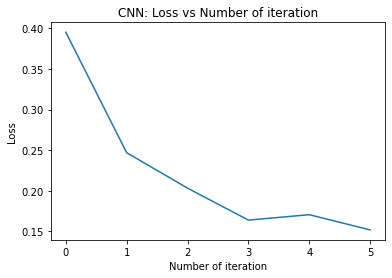

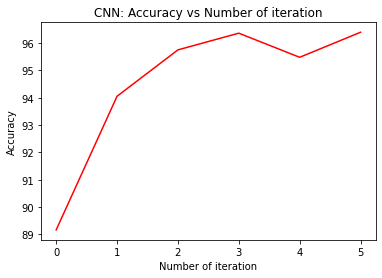

In [24]:
from matplotlib import pyplot as plt
# visualization loss 
iteration_list=[0,1,2,3,4,5]
plt.plot(iteration_list,loss_list_final)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("CNN: Loss vs Number of iteration")
plt.show()

# visualization accuracy 
plt.plot(iteration_list,accuracy_list,color = "red")
plt.xlabel("Number of iteration")
plt.ylabel("Accuracy")
plt.title("CNN: Accuracy vs Number of iteration")
plt.show()


In [25]:
torch.save(model.state_dict(), "3dcnn.pth")